In [6]:
class Cube:
    def __init__(self):
        self.cube_colors = {
            "white": 0,
            "yellow": 1,
            "green": 2,
            "blue": 3,
            "red": 4,
            "orange": 5,
        }

        self.faces = {
            "Up": [self.cube_colors["white"] for _ in range(4)],
            "Down": [self.cube_colors["yellow"] for _ in range(4)],
            "Front": [self.cube_colors["green"] for _ in range(4)],
            "Back": [self.cube_colors["blue"] for _ in range(4)],
            "Left": [self.cube_colors["red"] for _ in range(4)],
            "Right": [self.cube_colors["orange"] for _ in range(4)],
        }

    def is_solved(self):
        """Check if the cube is solved"""
        return all(len(set(face)) == 1 for face in self.faces.values())

    def rotate_face_clockwise(self, face):
        face[0], face[1], face[2], face[3] = face[2], face[0], face[3], face[1]

    def rotate_face_counterclockwise(self, face):
        face[0], face[1], face[2], face[3] = face[1], face[3], face[0], face[2]

    def move_left(self):
        self.rotate_face_clockwise(self.faces["Left"])

        # store the edge pieces
        up_edge = [self.faces["Up"][0], self.faces["Up"][2]]
        front_edge = [self.faces["Front"][0], self.faces["Front"][2]]
        down_edge = [self.faces["Down"][0], self.faces["Down"][2]]
        back_edge = [self.faces["Back"][0], self.faces["Back"][2]]

        # update the edge pieces
        # up adjacent to front
        self.faces["Front"][0], self.faces["Front"][2] = up_edge[0], up_edge[1]
        # front adjacent to down
        self.faces["Down"][0], self.faces["Down"][2] = front_edge[0], front_edge[1]
        # down adjacent to back
        self.faces["Back"][0], self.faces["Back"][2] = down_edge[0], down_edge[1]
        # back adjacent to up
        self.faces["Up"][0], self.faces["Up"][2] = back_edge[0], back_edge[1]

        # no need to return self.faces since it is passed by reference

    def move_right(self):
        self.rotate_face_clockwise(self.faces["Right"])

        # store the edge pieces
        up_edge = [self.faces["Up"][1], self.faces["Up"][3]]
        front_edge = [self.faces["Front"][1], self.faces["Front"][3]]
        down_edge = [self.faces["Down"][1], self.faces["Down"][3]]
        back_edge = [self.faces["Back"][1], self.faces["Back"][3]]

        # update the edge pieces
        # up adjacent to back
        self.faces["Back"][1], self.faces["Back"][3] = up_edge[0], up_edge[1]
        # back adjacent to down
        self.faces["Down"][1], self.faces["Down"][3] = back_edge[0], back_edge[1]
        # down adjacent to front
        self.faces["Front"][1], self.faces["Front"][3] = down_edge[0], down_edge[1]
        # front adjacent to up
        self.faces["Up"][1], self.faces["Up"][3] = front_edge[0], front_edge[1]

        # no need to return self.faces since it is passed by reference

    def move_up(self):
        self.rotate_face_clockwise(self.faces["Up"])

        # Store the edge pieces
        front_edge = [self.faces["Front"][0], self.faces["Front"][1]]
        right_edge = [self.faces["Right"][0], self.faces["Right"][1]]
        back_edge = [self.faces["Back"][0], self.faces["Back"][1]]
        left_edge = [self.faces["Left"][0], self.faces["Left"][1]]

        # Update the edge pieces in clockwise order
        # Front adjacent to Left
        # Front's top edge goes to Right
        self.faces["Right"][0], self.faces["Right"][1] = front_edge[0], front_edge[1]
        # Right's top edge goes to Back
        self.faces["Back"][0], self.faces["Back"][1] = right_edge[0], right_edge[1]
        # Back's top edge goes to Left
        self.faces["Left"][0], self.faces["Left"][1] = back_edge[0], back_edge[1]
        # Left's top edge goes to Front
        self.faces["Front"][0], self.faces["Front"][1] = left_edge[0], left_edge[1]

    def move_down(self):
        self.rotate_face_clockwise(self.faces["Down"])

        # Store the edge pieces
        front_edge = [self.faces["Front"][2], self.faces["Front"][3]]
        right_edge = [self.faces["Right"][2], self.faces["Right"][3]]
        back_edge = [self.faces["Back"][2], self.faces["Back"][3]]
        left_edge = [self.faces["Left"][2], self.faces["Left"][3]]

        # Update the edge pieces in clockwise order
        # Front adjacent to Right
        self.faces["Right"][2], self.faces["Right"][3] = front_edge[0], front_edge[1]
        # Right adjacent to Back
        self.faces["Back"][2], self.faces["Back"][3] = right_edge[0], right_edge[1]
        # Back adjacent to Left
        self.faces["Left"][2], self.faces["Left"][3] = back_edge[0], back_edge[1]
        # Left adjacent to Front
        self.faces["Front"][2], self.faces["Front"][3] = left_edge[0], left_edge[1]

    def move_front(self):
        self.rotate_face_clockwise(self.faces["Front"])

        # Store the edge pieces
        up_edge = [self.faces["Up"][2], self.faces["Up"][3]]
        right_edge = [self.faces["Right"][0], self.faces["Right"][2]]
        down_edge = [self.faces["Down"][0], self.faces["Down"][1]]
        left_edge = [self.faces["Left"][1], self.faces["Left"][3]]

        # Update the edge pieces in clockwise order
        # Up adjacent to Left
        # Up's bottom edge goes to Right's left edge
        self.faces["Right"][0], self.faces["Right"][2] = up_edge[0], up_edge[1]
        # Right's left edge goes to Down's top edge
        self.faces["Down"][0], self.faces["Down"][1] = right_edge[0], right_edge[1]
        # Down's top edge goes to Left's right edge
        self.faces["Left"][1], self.faces["Left"][3] = down_edge[0], down_edge[1]
        # Left's right edge goes to Up's bottom edge
        self.faces["Up"][2], self.faces["Up"][3] = left_edge[0], left_edge[1]

    def move_back(self):
        self.rotate_face_clockwise(self.faces["Back"])

        # Store edge pieces
        up_edge = [self.faces["Up"][0], self.faces["Up"][1]]  # Top edge of Up face
        left_edge = [
            self.faces["Left"][0],
            self.faces["Left"][2],
        ]  # Left edge of Left face
        down_edge = [
            self.faces["Down"][2],
            self.faces["Down"][3],
        ]  # Bottom edge of Down face
        right_edge = [
            self.faces["Right"][1],
            self.faces["Right"][3],
        ]  # Right edge of Right face

        # When Back rotates clockwise:
        # Up's top edge goes to Left's left edge
        self.faces["Left"][0], self.faces["Left"][2] = up_edge[0], up_edge[1]
        # Left's left edge goes to Down's bottom edge
        self.faces["Down"][2], self.faces["Down"][3] = left_edge[0], left_edge[1]
        # Down's bottom edge goes to Right's right edge
        self.faces["Right"][1], self.faces["Right"][3] = down_edge[0], down_edge[1]
        # Right's right edge goes to Up's top edge
        self.faces["Up"][0], self.faces["Up"][1] = right_edge[0], right_edge[1]

    def __str__(self):
        """Visual representation of the cube in a 2D net format."""
        colors_map = {
            0: 'W',  # White
            1: 'Y',  # Yellow
            2: 'G',  # Green
            3: 'B',  # Blue
            4: 'R',  # Red
            5: 'O'   # Orange
        }

        # Helper function to get the 2x2 grid for a face
        def get_face_grid(face_name):
            colors = self.faces[face_name]
            grid = [
                [colors_map[colors[0]], colors_map[colors[1]]],
                [colors_map[colors[2]], colors_map[colors[3]]]
            ]
            return grid

        # Get grids for each face
        up = get_face_grid('Up')
        down = get_face_grid('Down')
        left = get_face_grid('Left')
        right = get_face_grid('Right')
        front = get_face_grid('Front')
        back = get_face_grid('Back')

        # Build the output lines
        lines = []

        # First, print the Up face centered
        blank = ' ' * 6  # Adjust spaces as needed
        lines.append(blank + ' '.join(up[0]))
        lines.append(blank + ' '.join(up[1]))
        lines.append('')  # Empty line for spacing

        # Then, print Left, Front, Right, Back faces in a row
        for row in range(2):
            line = []
            # Left face
            line.extend(left[row])
            line.append(' ')  # Space between faces
            # Front face
            line.extend(front[row])
            line.append(' ')
            # Right face
            line.extend(right[row])
            line.append(' ')
            # Back face
            line.extend(back[row])
            lines.append(' '.join(line))
        lines.append('')  # Empty line for spacing

        # Then, print the Down face centered
        lines.append(blank + ' '.join(down[0]))
        lines.append(blank + ' '.join(down[1]))

        return '\n'.join(lines)

# ... [Rest of the code remains unchanged] ...

if __name__ == "__main__":
    cube = Cube()
    print("Initial cube state:")
    print(cube)
    print("\nIs solved:", cube.is_solved())

    print("\nPerforming some moves...")
    cube.move_right()
    cube.move_up()
    cube.move_front()

    print("\nCube state after moves:")
    print(cube)
    print("\nIs solved:", cube.is_solved())

{'Up': [0, 0, 0, 0], 'Down': [1, 1, 1, 1], 'Front': [2, 2, 2, 2], 'Back': [3, 3, 3, 3], 'Left': [4, 4, 4, 4], 'Right': [5, 5, 5, 5]}


In [7]:
# check if the cube is solved
def is_solved(): 
    for each in face:
        if len(set(face[each])) > 1: 
            return False
        
    return True

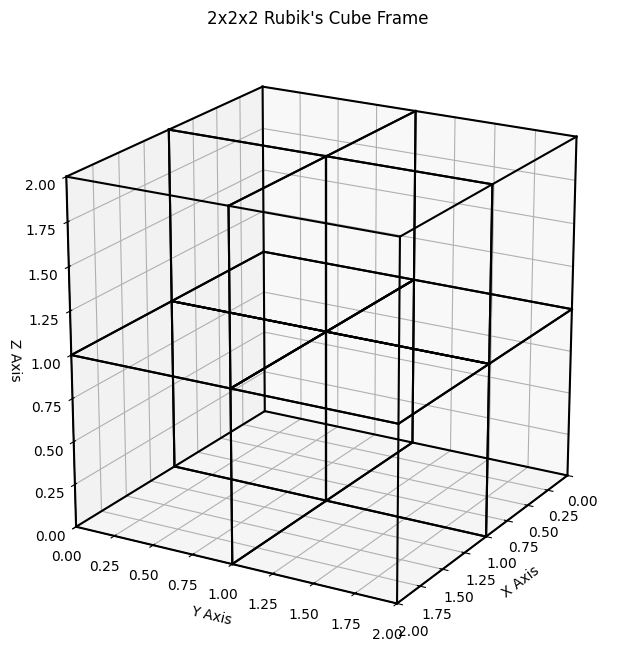

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
def plot_2x2x2_cube():
    # Create a new figure for 3D plotting
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Define the size of the small cubes
    cube_size = 1

    # Define the positions of the 8 small cubes
    # Each small cube is defined by its (x, y, z) starting corner
    positions = list(itertools.product([0, cube_size], repeat=3))

    # Function to plot the edges of a small cube
    def plot_cube(ax, position, size=1, edge_color='black'):
        x, y, z = position
        # Define the 8 vertices of the cube
        vertices = [
            [x, y, z],
            [x + size, y, z],
            [x + size, y + size, z],
            [x, y + size, z],
            [x, y, z + size],
            [x + size, y, z + size],
            [x + size, y + size, z + size],
            [x, y + size, z + size]
        ]

        # Define the 12 edges of the cube by connecting vertices
        edges = [
            (0, 1), (1, 2), (2, 3), (3, 0),  # Bottom square
            (4, 5), (5, 6), (6, 7), (7, 4),  # Top square
            (0, 4), (1, 5), (2, 6), (3, 7)   # Vertical edges
        ]

        for edge in edges:
            start, end = edge
            xs = [vertices[start][0], vertices[end][0]]
            ys = [vertices[start][1], vertices[end][1]]
            zs = [vertices[start][2], vertices[end][2]]
            ax.plot(xs, ys, zs, color=edge_color)

    # Plot all 8 small cubes
    for pos in positions:
        plot_cube(ax, pos, size=cube_size, edge_color='black')

    # Set the aspect ratio to be equal
    ax.set_box_aspect([2, 2, 2])  # [x, y, z] ratios

    # Set labels (optional)
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')

    # Set limits
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_zlim(0, 2)

    # Set the viewing angle for better visualization
    ax.view_init(elev=20, azim=30)

    # Show the plot
    plt.title("2x2x2 Rubik's Cube Frame")
    plt.show()

# Create a 2x2x2 Rubik's Cube
plot_2x2x2_cube()
